### Salary Predictions Based on College Attributes

##### The purpose of this project is to make accurate salary predictions that are based on existing known salaries so students can make informed decisions when making their college choice. This model will help the colleges in marketing their school to future students as a reason to attend.

##### Data transformation and machine learning will be used to create a model that will predict a salary when region, school type, and major. 

##### The data for this model is relatively simplified as it has very few missing areas. The raw data consists of a dataset with the features listed above and their corresponding salaries. Twenty percent of this dataset was split into a test dataset with corresponding salaries so accuracy and error of the model can be determined.

##### The features in this data set are described as below:

##### Region: What area of the country the school is located in
##### School Type: Party, Engineering, State, Liberal Arts, or Ivy League
##### College Major: Biology, Business, Chemistry, Computer Science, Engineering, Literature, Math, Physics, or None

In [36]:
#import required libraries
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

### Data Preparation
#### Define relevant functions needed in the span of the project

In [83]:
#function to load the data into a Pandas Dataframe
def load_f(file):
    return pd.read_csv(file)

#clean the data - remove duplicates and salaries that are $0
def clean_d(original_df):
    clean_d = original_df.drop_duplicates(subset='School Name')
    clean_d = original_df[original_df.Salary>0]
    return clean_d

In [90]:
#load data
print("Loading data..")
college_df = load_f('salaries-by-college-type.csv')
region_df = load_f('salaries-by-region.csv')
major_df = load_f('degrees-that-pay-back.csv')

#define the variables
cat_vars = ['School Type', 'Region']
num_vars = ['Starting Median Salary', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary', 'Percent change from Starting Salary to Mid-Career Salary']
tar = 'Starting Median Salary'

#verify data is laoded 
college_df.head()

Loading data..


,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [39]:
#verify data is loaded - 
region_df.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


#### See lengths and dtypes of the loaded data frames

In [40]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   School Name                        269 non-null    object
 1   School Type                        269 non-null    object
 2   Starting Median Salary             269 non-null    object
 3   Mid-Career Median Salary           269 non-null    object
 4   Mid-Career 10th Percentile Salary  231 non-null    object
 5   Mid-Career 25th Percentile Salary  269 non-null    object
 6   Mid-Career 75th Percentile Salary  269 non-null    object
 7   Mid-Career 90th Percentile Salary  231 non-null    object
dtypes: object(8)
memory usage: 16.9+ KB


In [41]:
region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   School Name                        320 non-null    object
 1   Region                             320 non-null    object
 2   Starting Median Salary             320 non-null    object
 3   Mid-Career Median Salary           320 non-null    object
 4   Mid-Career 10th Percentile Salary  273 non-null    object
 5   Mid-Career 25th Percentile Salary  320 non-null    object
 6   Mid-Career 75th Percentile Salary  320 non-null    object
 7   Mid-Career 90th Percentile Salary  273 non-null    object
dtypes: object(8)
memory usage: 20.1+ KB


#### Check the shape of the dataframes

In [42]:
#shape of the data
print(college_df.shape)
print(region_df.shape)
print(major_df.shape)

(269, 8)
(320, 8)
(50, 8)


#### The data in the college_df has the Starting Median Salary, i.e the target variable along with School Name that corresponds with the School Name in the region_df. We will merge the two in a single dataframe.

In [107]:
#merge training data with features and training data with salary - store in train_df
train_df = pd.merge(college_df,region_df, on = 'School Name')

In [108]:
#verify features on merged data
train_df.head()

,School Name,School Type,Starting Median Salary_x,Mid-Career Median Salary_x,Mid-Career 10th Percentile Salary_x,Mid-Career 25th Percentile Salary_x,Mid-Career 75th Percentile Salary_x,Mid-Career 90th Percentile Salary_x,Region,Starting Median Salary_y,Mid-Career Median Salary_y,Mid-Career 10th Percentile Salary_y,Mid-Career 25th Percentile Salary_y,Mid-Career 75th Percentile Salary_y,Mid-Career 90th Percentile Salary_y
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00",Northeastern,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00",Northeastern,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN,Northeastern,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [109]:
#verify shape of the merged data-
print(train_df.shape)

(268, 15)


#### The dataframes merged correctly as we see the shape and the features are correct.  We will now delete the unneeded columns, rename the Starting Median Salary column, and check for missing values.

In [110]:
#Remove the fields from the data set that we don't want to include in our model

del train_df['Mid-Career 10th Percentile Salary_x']
del train_df['Mid-Career 25th Percentile Salary_x']
del train_df['Mid-Career 75th Percentile Salary_x']
del train_df['Mid-Career 90th Percentile Salary_x']
del train_df['Mid-Career Median Salary_x']
del train_df['Mid-Career Median Salary_y']
del train_df['Mid-Career 10th Percentile Salary_y']
del train_df['Mid-Career 25th Percentile Salary_y']
del train_df['Mid-Career 75th Percentile Salary_y']
del train_df['Mid-Career 90th Percentile Salary_y']
del train_df['Starting Median Salary_y']

In [111]:
#Rename the Starting Median Salary Column
train_df.rename(columns = {'Starting Median Salary_x':'Salary'}, inplace=True)

In [112]:
#verify shape of the remaining data-
print(train_df.shape)

(268, 4)


In [113]:
#store the sum of missing values in each column - 
missing_val = train_df.isnull().sum()
missing_val

School Name    0
School Type    0
Salary         0
Region         0
dtype: int64

#### There are now missing values.  Now we will clean the data.

In [141]:
train_df['Salary']=(train_df['Salary'].replace( '[\$,)]','', regex=True )
                   .replace( '[(]','-',   regex=True ).astype(float))

In [142]:
#store the the salaries in the training data which are less than or equal to 0
zero_sal = train_df['Salary']<=0
inval = train_df[zero_sal]
inval

,School Name,School Type,Salary,Region


In [143]:
#clean the data i.e, remove duplicates and remove the salaries that are invalid or not useful for predictions like salary<=0
#calling the function
clean_train_df = clean_d(train_df)

In [144]:
#Remove the fields from the data set that we don't want to include in our model
del clean_train_df['School Name']

In [145]:
print(clean_train_df.shape)

(268, 3)


In [146]:
#Reset the index values after dropping the invalid values 
clean_train_df.reset_index(drop = True)
clean_train_df.tail()

,School Type,Salary,Region
263,State,37700.0,Southern
264,State,40400.0,Midwestern
265,State,41900.0,Western
266,State,37900.0,Western
267,State,35300.0,Midwestern


#### Next, we will check the data types to be sure they are appropriate for the columns.

In [147]:
print(clean_train_df.dtypes)

School Type     object
Salary         float64
Region          object
dtype: object


### Exploratory Data Analysis
#### Quantitative Data Descriptive Statistics

In [148]:
clean_train_df.describe()

,Salary
count,268.000000
mean,46043.656716
std,6411.734098
min,34800.000000
25%,42000.000000
50%,44700.000000
75%,48150.000000
max,75500.000000


#### In looking at the above, the count, min, and max look correct for the salary data. The mean and standard deviation don't provide any indication that something is with the salary data.

In [149]:
#count of unique values in categorical data
for cat in cat_vars:
    if cat != 'Salary':
       print(clean_train_df[cat].value_counts())

State           175
Liberal Arts     47
Party            20
Engineering      18
Ivy League        8
Name: School Type, dtype: int64
Northeastern    70
Southern        68
Midwestern      64
Western         39
California      27
Name: Region, dtype: int64


In [150]:
# unique values in clean_train_df data -
clean_train_df.nunique()

School Type      5
Salary         145
Region           5
dtype: int64

In [151]:
#compute the kurtosis and skewness of salary
print('Salary Skewness:', clean_train_df['Salary'].skew())
print('Salary Kurtosis:', clean_train_df['Salary'].kurt())
print('\n')

Salary Skewness: 1.5322161789586024
Salary Kurtosis: 3.3167694686433755




#### The Salary Skewness is greater than +1, this is an indication of a substaintially positively skewed distribution.  For kurtosis, the general guideline is that if the number is greater than +1, the distribution is too peaked.  Our number of 3.316 indicates a distribution that is more peaked than a normal distribution (kurtosis of 0).

### Visualize target variable (Salary)

In [152]:
#We use IQR to identify potential outliers 

stats = clean_train_df['Salary'].describe()
IQR = stats['75%'] - stats['25%']
upper_bound = stats['75%'] + 1.5 * IQR
lower_bound = stats['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper_bound, lower_bound))

The upper and lower bounds for suspected outliers are 57375.0 and 32775.0.


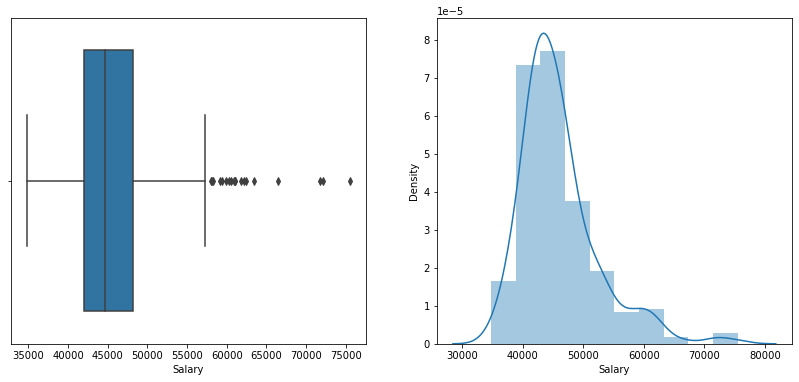

In [154]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(clean_train_df['Salary'])
plt.subplot(1,2,2)
sns.distplot(clean_train_df['Salary'], bins = 10)
plt.show()

In [156]:
# Examine the outliers below the lower bound- 
clean_train_df[clean_train_df['Salary'] < 32775.0]

,School Type,Salary,Region


In [159]:
#Examine potential outliers above the upper bound - 
clean_train_df.loc[clean_train_df['Salary'] > 57375.0, 'School Type'].value_counts()

Engineering    11
Ivy League      7
State           1
Name: School Type, dtype: int64

In [160]:
#Examine potential outliers above the upper bound - 
clean_train_df.loc[clean_train_df['Salary'] > 57375.0, 'Region'].value_counts()

Northeastern    14
California       3
Southern         1
Western          1
Name: Region, dtype: int64

####  It looks like the outliers are all attributed to engineering school types or the northeastern region.  Engineering School Type produced the highest salaries in the data set and Ivy League Schools are located in the Northeastern Region.  This seems appropriate so we will keep the data.

### Visualize numberical data with salary